Ветренко Полина, М8О-306Б-17

Датасет взят с сайта Kaggle: https://www.kaggle.com/shivam2503/diamonds

**Описание датасета**:

Датасет содержит данные о бриллиантах:

- price - цена
- carat - вес бриллианта
- cut - огранка бриллианта 
- color - цвет
- clarity - чистота бриллианта
- depth - глубина бриллианта 
- table - ширина верхней части бриллианта относительно самой широкой точки
- x - длина в мм.
- y - ширина в мм.
- z - глубина в мм.

**Задача**: предсказать цену бриллианта

**Импортируем необходимые библиотеки**

In [139]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing

**Импортируем данные**

Просматриваем содержимое

In [140]:
data = pd.read_csv('data/diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Удаляем первый столбец, т.к. он не несет в себе никакой информации

In [141]:
data.drop(data.columns[[0]], axis=1, inplace=True) 

Смотрим на содержимое

In [142]:
data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


Размерность датасета

In [143]:
data.shape

(53940, 10)

Получаем информацию о данных: количество и тип

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Обращаем внимание на то, что в нашем датасете нет пропусков в данных,что немного облегчает задачу. Но имеются данные типа object, которые необходимо перевести в численный тип.

Посмотрим на информацию по всей таблице и по всем признакам:

In [145]:
data.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


Количество значений для каждого столбца:

In [147]:
data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

Анализируем по корреляции, что из всех имеющихся признаков больше всего влияет на стоимость.

In [165]:
data.corr()['price'].sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

Легко заметить, что вес бриллианта является наиболее значимым признаком в определении цены. Также немалое значение имеют и длина, ширина и высота бриллианта, что логично, ведь размер прямо пропорционален весу.

**Кодирование данных**

In [166]:
data_dict = dict(data.nunique())
print(data_dict)

{'carat': 273, 'cut': 5, 'color': 7, 'clarity': 8, 'depth': 184, 'table': 127, 'price': 11602, 'x': 554, 'y': 552, 'z': 375}


Анализируем признаки типа object

In [167]:
data_dict_binary = {'cut', 'color', 'clarity'}
data[data_dict_binary]

,cut,color,clarity
0,4,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3
...,...,...,...
53935,4,0,2
53936,1,0,2
53937,2,0,2
53938,3,4,3


Смотрим на все значения, которые они могут принимать

In [168]:
data_cat = data.select_dtypes(include='object')
data_cat['cut'].value_counts()

4    21551
3    13791
2    12082
1     4906
0     1610
Name: cut, dtype: int64

In [169]:
data_cat = data.select_dtypes(include='object')
data_cat['color'].value_counts()

3    11292
1     9797
2     9542
4     8304
0     6775
5     5422
6     2808
Name: color, dtype: int64

In [170]:
data_cat = data.select_dtypes(include='object')
data_cat['clarity'].value_counts()

2    13065
5    12258
3     9194
4     8171
7     5066
6     3655
1     1790
0      741
Name: clarity, dtype: int64

Так как данных немного, то можно сделать это вручную

In [171]:
for cut in data_dict_binary:
    data.loc[data[cut] == 'Fair', cut] = 0
    data.loc[data[cut] == 'Good', cut] = 1
    data.loc[data[cut] == 'Very Good', cut] = 2
    data.loc[data[cut] == 'Premium', cut] = 3
    data.loc[data[cut] == 'Ideal', cut] = 4
for color in data_dict_binary:
    data.loc[data[color] == 'D', color] = 0
    data.loc[data[color] == 'E', color] = 1
    data.loc[data[color] == 'F', color] = 2
    data.loc[data[color] == 'G', color] = 3
    data.loc[data[color] == 'H', color] = 4
    data.loc[data[color] == 'I', color] = 5
    data.loc[data[color] == 'J', color] = 6
for clarity in data_dict_binary:
    data.loc[data[clarity] == 'I1', clarity] = 0
    data.loc[data[clarity] == 'IF', clarity] = 1
    data.loc[data[clarity] == 'SI1', clarity] = 2
    data.loc[data[clarity] == 'SI2', clarity] = 3
    data.loc[data[clarity] == 'VS1', clarity] = 4
    data.loc[data[clarity] == 'VS2', clarity] = 5
    data.loc[data[clarity] == 'VVS1', clarity] = 6
    data.loc[data[clarity] == 'VVS2', clarity] = 7
data[data_dict_binary]

,cut,color,clarity
0,4,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3
...,...,...,...
53935,4,0,2
53936,1,0,2
53937,2,0,2
53938,3,4,3


Строим корреляционную матрицу

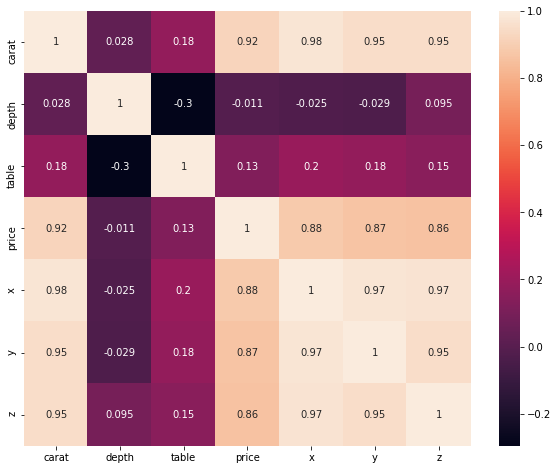

In [174]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

Так как вес бриллианта наиболее сильно влияет на его стоимость, то посмотрим более подробно на диаграмму рассеивания.

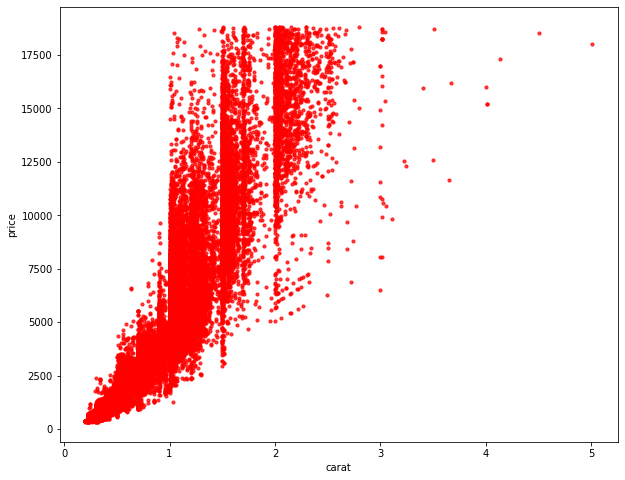

In [88]:
f, ax = plt.subplots(figsize=(10, 8))
ax.scatter(data['carat'], data['price'], s = 10, color = 'r', alpha = 0.75)
# ax.set_title(title)
ax.set_xlabel('carat')
ax.set_ylabel('price');

Как и ожидалось: чем меньше вес бриллианта, тем ниже его стоимость.

Посмотрим также на плотности величит x, y и z, которые непосредственно влияют на вес бриллианта.

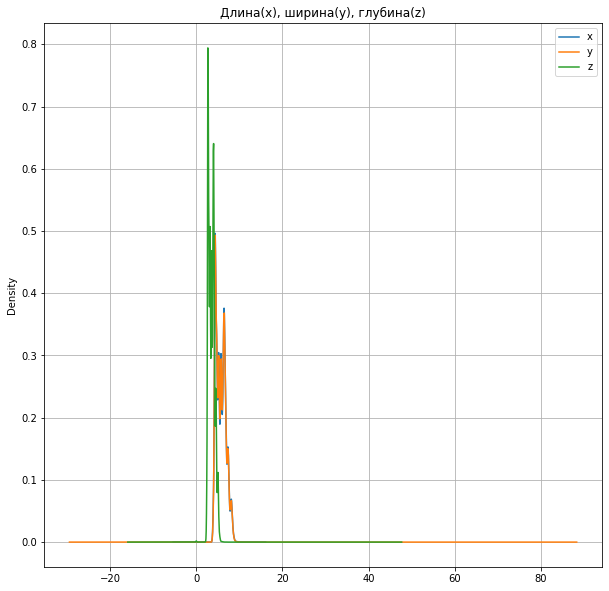

In [176]:
fig, ax = plt.subplots(figsize=(10, 10))
marks = data[['x', 'y', 'z']]
marks.plot.kde(ax=ax, legend=True, title='Длина(x), ширина(y), глубина(z)')
ax.grid(axis='y')
ax.grid(axis='x')

**Нормализация данных**


Качество работы множества алгоритмов зависит от нормированности данных, поэтому нормализуем наш датасет.

Для нормализации воспользуемся Z-масштабированием: разницы между переменной и средним значением делится на стандартное отклонение.

In [177]:
data_normalized = (data - data.mean()) / data.std()
data_normalized.describe()

,carat,depth,table,price,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,3.444749e-14,5.514971e-13,-2.212404e-14,-5.901430e-17,1.007943e-13,8.000232e-14,-2.512998e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.261446e+00,-1.308748e+01,-6.470013e+00,-9.040868e-01,-5.109073e+00,-5.020884e+00,-5.014510e+00
25%,-8.395154e-01,-5.231005e-01,-6.521325e-01,-7.476738e-01,-9.103164e-01,-8.882717e-01,-8.909378e-01
50%,-2.066190e-01,3.531645e-02,-2.046032e-01,-3.839636e-01,-2.777527e-02,-2.147379e-02,-1.237607e-02
75%,5.106635e-01,5.239313e-01,6.904554e-01,3.487834e-01,7.210475e-01,7.052356e-01,7.103118e-01
max,8.885992e+00,1.204128e+01,1.680151e+01,3.732404e+00,4.465161e+00,4.654922e+01,4.004720e+01
